<a href="https://colab.research.google.com/github/Anubhavrajak/Hackfest2022/blob/main/Loan_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/train_ctrUa4K (1).csv")
df_test = pd.read_csv("/content/test_lAUu6dG (1).csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test_other = df_test.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
(df.isnull().sum()*100)/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [ ]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace = True)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
def remoutl(train,col):
 percentile25 = train[col].quantile(0.25)
 percentile75 = train[col].quantile(0.75)
 print(percentile25,percentile75)
 iqr=percentile75-percentile25
 upper_limit = percentile75 + 1.5 * iqr
 lower_limit = percentile25 - 1.5 * iqr
 
 train[col] = np.where(
 train[col] > upper_limit,
 upper_limit,
 np.where(
 train[col] < lower_limit,
 lower_limit,
 train[col]
 )
 )



In [ ]:
cols_rem = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for cols in cols_rem:
  remoutl(df,cols)

2877.5 5795.0
0.0 2297.25
100.25 164.75


In [ ]:
print(df['ApplicantIncome'].skew())
print(df['CoapplicantIncome'].skew())
print(df['LoanAmount'].skew())

1.0398459567416636
1.012762761452279
0.6836926591947383


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


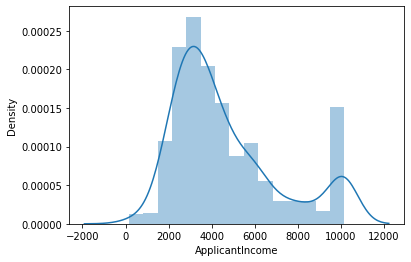

In [ ]:
import seaborn as sns
sns.distplot(df['ApplicantIncome'])

In [ ]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

In [ ]:
df['CoapplicantIncome'] = (df['CoapplicantIncome'])**.5
df['LoanAmount'] = (df['LoanAmount'])**.5

In [ ]:
print(df['ApplicantIncome'].skew())
print(df['CoapplicantIncome'].skew())
print(df['LoanAmount'].skew())

-0.5950565078107836
0.19282967978686388
0.06413966158093104


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,11.313708,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,11.874342,360.0,1.0,Urban,Y


In [ ]:
lbl = ['Gender','Married','Education','Dependents','Self_Employed','Loan_Amount_Term','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in lbl:
  df[i] = label.fit_transform(df[i])
  

In [ ]:
lbl = ['Gender','Married','Education','Dependents','Self_Employed','Loan_Amount_Term','Property_Area']
label = LabelEncoder()
for i in lbl:
  df_test[i] = label.fit_transform(df_test[i])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,11.313708,8,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,38.832976,11.313708,8,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,8.124038,8,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,48.559242,10.954451,8,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,11.874342,8,1.0,2,1


In [ ]:
df.drop("Loan_ID",axis=1,inplace=True)
df_test.drop("Loan_ID",axis=1,inplace=True)
df['Credit_History'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_History, Length: 614, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status',axis=1)
y=df.Loan_Status
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
580,1,1,2,0,0,8.785692,0.000000,14.317821,8,1.0,1
68,1,1,3,1,1,8.867850,0.000000,11.180340,2,1.0,2
586,1,1,0,0,0,7.739359,39.012818,10.198039,8,1.0,2
340,1,1,3,1,0,7.881182,39.837169,13.152946,8,1.0,0
575,1,1,2,0,0,8.058011,21.470911,10.392305,3,1.0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train[['LoanAmount','CoapplicantIncome','ApplicantIncome']] = mms.fit_transform(x_train[['LoanAmount','CoapplicantIncome','ApplicantIncome']])
x_test[['LoanAmount','CoapplicantIncome','ApplicantIncome']] = mms.transform(x_test[['LoanAmount','CoapplicantIncome','ApplicantIncome']])

In [ ]:
df_test[['LoanAmount','CoapplicantIncome','ApplicantIncome']] = mms.fit_transform(df_test[['LoanAmount','CoapplicantIncome','ApplicantIncome']])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgl = LogisticRegression()
lgl.fit(x_train,y_train)
y_pred = lgl.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8162162162162162


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdc = RandomForestClassifier()
rdc.fit(x_train,y_train)
y_pred_rc = rdc.predict(x_test)
print(accuracy_score(y_test,y_pred_rc))

0.7891891891891892


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada))

0.7783783783783784


In [ ]:
pred_test = lgl.predict(df_test)

In [ ]:
submission = pd.read_csv("/content/sample_submission_49d68Cx (1).csv")

In [ ]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_other['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace = True)
submission['Loan_Status'].replace(1, 'Y',inplace = True)

In [ ]:
pd.DataFrame(submission, columns= ['Loan_Status', 'Loan_ID']).to_csv('To_Submit.csv')